IMPORTING LIBRARIES

In [1]:
conda install -c conda-forge tweepy

In [2]:
from tweepy import OAuthHandler
from timeit import default_timer as timer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import tweepy 
import json
import tweepy



READING THE FILE

In [3]:
df1 = pd.read_csv("twitter-archive-enhanced.csv")

In [4]:
df1.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [5]:
df1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [ ]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)

df2 = pd.read_csv("image-predictions.tsv", sep='\t')
df2.shape

In [6]:
df2 = pd.read_csv("image-predictions.tsv", sep='\t')

In [7]:
df2.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [8]:
df2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [9]:
dummy = pd.read_json("tweet-json.txt", orient = 'records', lines = True)


In [10]:
df3= dummy[["id", "retweet_count", "favorite_count"]].copy()
df3= df3.rename(columns={"id": "tweet_id"})

In [11]:
df3.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


Assessing Data

Creating a copy dataset for backup 

In [12]:
copy1 = df1.copy()
copy2 = df2.copy()
copy3 = df3.copy()

**TIDINESS**

1) All the three datasets should be merged 

In [13]:
data = df2.merge(df1, on='tweet_id', how='inner').merge(df3, on='tweet_id', how='inner')

In [14]:
data.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,...,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None,532,2535
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,...,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None,48,132
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,...,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None,47,128
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,...,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None,147,311
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,...,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None,41,111


In [15]:
copy_main = data.copy()

Check if there are any  duplicates, drop duplicate rows if they exist

In [16]:
data.duplicated().sum()

0

Understanding the variables

In [17]:
data.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               88
Chihuahua              83
pug                    57
                     ... 
cheeseburger            1
bookshop                1
bison                   1
restaurant              1
terrapin                1
Name: p1, Length: 378, dtype: int64

Inference:


there are several inaccurate values such as sunglasses, quilt and thus they should be dropped for increasing the accuracy.

*Variable 'in_reply_to_status_id'*

In [18]:
data.in_reply_to_status_id.unique()

array([           nan, 6.67806455e+17, 6.71561002e+17, 6.74752233e+17,
       6.71729907e+17, 6.74793399e+17, 6.74999808e+17, 6.75497103e+17,
       6.75707330e+17, 6.84222868e+17, 6.84481075e+17, 6.92041935e+17,
       6.70668383e+17, 6.75349384e+17, 7.03041950e+17, 6.67152164e+17,
       7.03255936e+17, 7.29113531e+17, 6.91416866e+17, 7.46885919e+17,
       7.33109485e+17, 7.59099524e+17, 8.55818117e+17])

Inference:

This helps to identify the original tweets, and helps to drop the other ones.

*Variable 'in_reply_to_user_id'*

In [19]:
data.in_reply_to_user_id.unique()

array([           nan, 4.19698384e+09])

Inference:

This helps to identify the original tweets, and helps to drop the other ones.

*Variable 'timestamp'*

In [20]:
data.timestamp.unique()

array(['2015-11-15 22:32:08 +0000', '2015-11-15 23:05:30 +0000',
       '2015-11-15 23:21:54 +0000', ..., '2017-07-31 00:18:03 +0000',
       '2017-08-01 00:17:27 +0000', '2017-08-01 16:23:56 +0000'],
      dtype=object)

Inference:

The datatype needs to be modified to a date-type format.

*Variable 'retweeted_status_id'*

In [21]:
data.retweeted_status_id.unique()

array([           nan, 6.67548415e+17, 6.67548696e+17, 7.11998280e+17,
       6.75354436e+17, 6.79158374e+17, 7.57597141e+17, 6.79062614e+17,
       6.70319131e+17, 7.39544079e+17, 7.11694788e+17, 6.85325113e+17,
       7.25842289e+17, 7.41067307e+17, 6.73320133e+17, 7.65222099e+17,
       7.33109485e+17, 6.79828447e+17, 7.50429298e+17, 7.03041950e+17,
       7.80465709e+17, 7.42423170e+17, 7.07610949e+17, 6.74291837e+17,
       7.79834333e+17, 7.61004548e+17, 7.89986466e+17, 7.63837566e+17,
       7.91672323e+17, 7.88765915e+17, 7.89530877e+17, 7.96149749e+17,
       7.71770457e+17, 6.67509364e+17, 6.70444956e+17, 6.71896809e+17,
       6.75501076e+17, 7.01214701e+17, 7.12809026e+17, 7.75085133e+17,
       7.76113306e+17, 7.79056096e+17, 7.77684234e+17, 6.91416866e+17,
       7.84826020e+17, 7.82722599e+17, 7.83334640e+17, 7.82969140e+17,
       8.01167903e+17, 7.93962222e+17, 7.90277117e+17, 7.32005617e+17,
       7.90946056e+17, 8.15966073e+17, 7.73547597e+17, 8.19006401e+17,
      

Inference:

This helps to identify the original tweets, and helps to drop the other ones.

*Variable 'retweeted_status_user_id'*

In [22]:
data.retweeted_status_user_id.unique()

array([           nan, 4.29683174e+09, 7.83214000e+05, 4.19698384e+09,
       2.80479778e+08, 1.22832566e+09, 4.87197737e+08, 7.26634734e+08,
       8.11740824e+08, 4.11984180e+07, 5.97064155e+08, 3.41021133e+08,
       3.63890752e+08, 7.87461778e+17, 5.12804507e+08])

Inference:

This helps to identify the original tweets, and helps to drop the other ones.

In [23]:
data.rating_numerator.unique()

array([   8,    7,    9,    6,    5,   10,    2,   11,    1,    3,   12,
          4,   13,  420,   88,  144,   26,  121,  143,   14,   44,   60,
         45,   80,   99,   50,  204,    0, 1776,  165,   27,   75,   24,
         84,   15])

Inference:

The ratings below 10 should be dropped for optimum results.

*Variable 'rating_denominator'*

In [24]:
data.rating_denominator.value_counts()

10     2055
50        3
11        2
80        2
7         1
170       1
150       1
130       1
120       1
110       1
90        1
70        1
40        1
20        1
2         1
Name: rating_denominator, dtype: int64

Demonitors having values of 10 only should be included, other ones should be dropped

* 'doggo'*

In [25]:
data.doggo.unique()

array(['None', 'doggo'], dtype=object)

*Variable 'floofer'*

In [26]:
data.floofer.unique()

array(['None', 'floofer'], dtype=object)

*Variable 'pupper'*

In [27]:
data.pupper.unique()

array(['None', 'pupper'], dtype=object)

*Variable 'puppo'*

In [28]:
data.puppo.unique()

array(['None', 'puppo'], dtype=object)

they showcase the same thing and hence can be combined together

**Cleaning the dataset**

In [29]:
data.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'in_reply_to_status_id',
       'in_reply_to_user_id', 'timestamp', 'source', 'text',
       'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'retweet_count', 'favorite_count'],
      dtype='object')

**QUALITY**

1) Renaming the column names by displaying their full forms and capitalizing them for better understanding



In [30]:
data = data.rename(columns={"p1":"first_prediction", "p1_conf":"confidence_of_first_prediction", "p1_dog":"Result_of_First_Prediction","p2":"Second_Prediction", "p2_conf":"Confidence_of_Second_Prediction", "p2_dog":"Result_of_Second_Prediction","p3":"Third_Prediction", "p3_conf":"Confidence_of_Third_Prediction", "p3_dog":"Result_of_Third_Prediction"})
data.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'first_prediction',
       'confidence_of_first_prediction', 'Result_of_First_Prediction',
       'Second_Prediction', 'Confidence_of_Second_Prediction',
       'Result_of_Second_Prediction', 'Third_Prediction',
       'Confidence_of_Third_Prediction', 'Result_of_Third_Prediction',
       'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'source',
       'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'retweet_count', 'favorite_count'],
      dtype='object')

**QUALITY**

2) Removing tweets which are replies

In [31]:
data=data[data['in_reply_to_status_id'].isnull()]


**QUALITY**

3) Removing tweets having no user_id

In [32]:
data=data[data['in_reply_to_user_id'].isnull()]

**TIDINESS**

2) Removing the rows having status and user id as null values

In [33]:
data = data.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis=1)

In [34]:
data.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'first_prediction',
       'confidence_of_first_prediction', 'Result_of_First_Prediction',
       'Second_Prediction', 'Confidence_of_Second_Prediction',
       'Result_of_Second_Prediction', 'Third_Prediction',
       'Confidence_of_Third_Prediction', 'Result_of_Third_Prediction',
       'timestamp', 'source', 'text', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'doggo', 'floofer', 'pupper', 'puppo', 'retweet_count',
       'favorite_count'],
      dtype='object')

**QUALITY**

4) Changing the datatype of the Timestamp column from oject to datetime

In [35]:
data['timestamp'] = pd.to_datetime(data['timestamp'])

In [36]:
data.dtypes

tweet_id                                         int64
jpg_url                                         object
img_num                                          int64
first_prediction                                object
confidence_of_first_prediction                 float64
Result_of_First_Prediction                        bool
Second_Prediction                               object
Confidence_of_Second_Prediction                float64
Result_of_Second_Prediction                       bool
Third_Prediction                                object
Confidence_of_Third_Prediction                 float64
Result_of_Third_Prediction                        bool
timestamp                          datetime64[ns, UTC]
source                                          object
text                                            object
retweeted_status_id                            float64
retweeted_status_user_id                       float64
retweeted_status_timestamp                      object
expanded_u

**QUALITY**

5) Considering rating values only above 10

In [37]:
data = data[data['rating_numerator'] >= 10]  
data['rating_numerator'].unique()

array([  10,   11,   12,   13,  420,   88,  144,   26,  121,   14,   44,
         60,   45,   80,   99,   50,  204, 1776,  165,   27,   75,   24,
         84,   15])

**QUALITY**

6) Ignoring rows not having denominator as 10

In [38]:
data = data[data['rating_denominator'] == 10]  
data['rating_denominator'].unique()

array([10])

**QUALITY**


7) Ignoring tweets which are retweets, since they are not original ones

In [39]:
data=data[data['retweeted_status_id'].isnull()]


**QUALITY**


8) Ignoring tweets which are retweets, since they are not original ones

In [40]:
data['retweeted_status_user_id'].value_counts()

Series([], Name: retweeted_status_user_id, dtype: int64)

**QUALITY**


9) Ignoring tweets which are retweets, since they are not original ones

In [41]:
data['retweeted_status_timestamp'].value_counts()

Series([], Name: retweeted_status_timestamp, dtype: int64)

**TIDINESS**


3) Ignoring tweets which are retweets, since they are not original ones

In [42]:
data = data.drop(['retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp'], axis=1)
data.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'first_prediction',
       'confidence_of_first_prediction', 'Result_of_First_Prediction',
       'Second_Prediction', 'Confidence_of_Second_Prediction',
       'Result_of_Second_Prediction', 'Third_Prediction',
       'Confidence_of_Third_Prediction', 'Result_of_Third_Prediction',
       'timestamp', 'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'retweet_count', 'favorite_count'],
      dtype='object')

Storing the dataframe

In [43]:
data.to_csv("twitter_archive_master.csv")

In [44]:
data.head()

,tweet_id,jpg_url,img_num,first_prediction,confidence_of_first_prediction,Result_of_First_Prediction,Second_Prediction,Confidence_of_Second_Prediction,Result_of_Second_Prediction,Third_Prediction,...,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,...,https://twitter.com/dog_rates/status/666050758...,10,10,a,None,None,None,None,60,136
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,...,https://twitter.com/dog_rates/status/666055525...,10,10,a,None,None,None,None,261,448
10,666063827256086533,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,1,golden_retriever,0.775930,True,Tibetan_mastiff,0.093718,True,Labrador_retriever,...,https://twitter.com/dog_rates/status/666063827...,10,10,the,None,None,None,None,232,496
12,666073100786774016,https://pbs.twimg.com/media/CT5d9DZXAAALcwe.jpg,1,Walker_hound,0.260857,True,English_foxhound,0.175382,True,Ibizan_hound,...,https://twitter.com/dog_rates/status/666073100...,10,10,None,None,None,None,None,174,335
16,666102155909144576,https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg,1,English_setter,0.298617,True,Newfoundland,0.149842,True,borzoi,...,https://twitter.com/dog_rates/status/666102155...,11,10,None,None,None,None,None,16,81


In [45]:
import seaborn as sns

corr=data[['retweet_count','favorite_count']].corr()

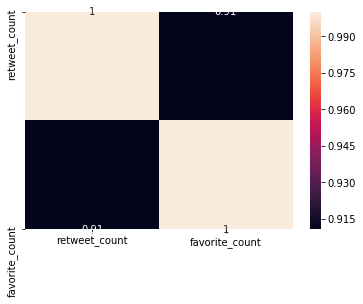

In [46]:
sns.heatmap(corr,annot=True)

INSIGHTS : 
    
    a) 0.91 shows that favorite_count, retweet_count have a direct corrleatiion 
    b) it means they are dependant on it 

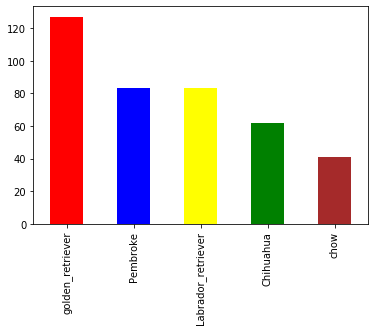

In [68]:
color=['red','blue','yellow','green','brown']
data['first_prediction'].value_counts().sort_values(ascending=False).head(5).plot(kind='bar',color=color)

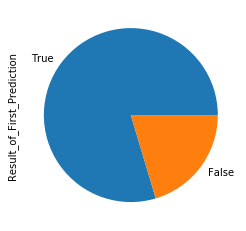

In [70]:
data['Result_of_First_Prediction'].value_counts().plot(kind='pie')

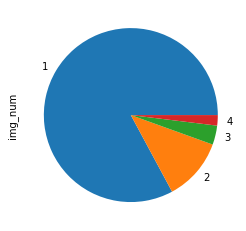

In [73]:
data.img_num.value_counts().plot(kind='pie')

Inference- 

Graph 1 - 

so as we can see in the first image there is the comparison between the retweet count and the favourite count the value 0.91 indicates that there is a very high amount of correlation between the retweet count and the favourite count,the with the help of the retweet count and the favourite Kaun one can try to determine that if a tweet is a trending tweet or if it is not attending feat so this is a very vital information which we can try to understand from the heat map which we have plotted

Graph2- 
over here we have tried to show a comparison between the various breed of the dog that have been obtained in the first prediction your we can try to analyse that we have the top five breed of the dog with respect to their accounts so the x-axis contains the names of the breed of the dog and the y-axis contains the count of each and every breed we can try to understand that the top five breach or your are the Golden Retriever dog Pembroke the labrador retriever and the Shuru so these are the top five breeds of the dogs that are present in the current data set when we try to obtain office prediction and this gives as an idea of how well the data has been distributed among the various values of the dog

Graph3-

here we have tried to showcase that what has been the result of the first prediction that we have tried to obtain we have try to understand that how many values have been turned out to be as two values and how many values have turned out to be a false value so we have tried to obtain the amount of crown and their trip to plot a pie chart on your and as we can observe easily with the help of the pie chart that the number of True values are really significantly high as compared to the false values

Graph4- 

in this particular graph we have try to understand that what are the count of a particular number of images that have been attached to a particular to eat as we know that the maximum count can be 4 number of images with a particular to eat so we have tried to obtain that how many images have been attached with a particular tweet as we can observe very easily with the help of a pie chart that one dominates the complete data set followed by two then 3 and then 4